In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots

# Some more magic so that the notebook will reload external python modules;
%load_ext autoreload
%autoreload 2

In [2]:
# load data
iris = load_iris()

x_train, y_train = iris.data[:100, :2], iris.target[:100]
y_train[y_train == 0] = -1

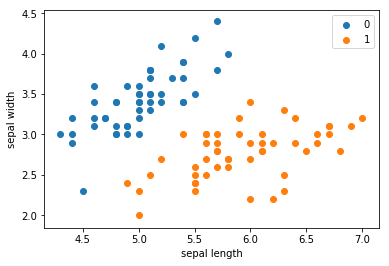

In [3]:
plt.scatter(x_train[:50, 0], x_train[:50, 1], label="0")
plt.scatter(x_train[50:, 0], x_train[50:, 1], label="1")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

plt.show()

In [4]:
from perceptron import Perceptron, DualPerceptron

In [5]:
# Original form perceptron
model1 = Perceptron()
%time model1.train(x_train, y_train, learning_rate=0.1, verbose=False)

CPU times: user 2.95 s, sys: 17.1 ms, total: 2.97 s
Wall time: 2.98 s


In [6]:
x_points = np.linspace(4, 7, 10)
y_pred = -(model1.W[0] * x_points + model1.b) / model1.W[1]
y_pred = np.squeeze(y_pred)

NameError: name 'model' is not defined

In [ ]:
plt.plot(x_points, y_pred)

plt.scatter(x_train[:50, 0], x_train[:50, 1], label="0")
plt.scatter(x_train[50:, 0], x_train[50:, 1], label="1")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

plt.show()

In [ ]:
# Dual form perceptron
model2 = DualPerceptron()
%time model2.train(x_train, y_train, learning_rate=0.1, verbose=False)

In [ ]:
x_points = np.linspace(4, 7, 10)
y_pred = -(model2.W[0] * x_points + model2.b) / model2.W[1]
y_pred = np.squeeze(y_pred)

plt.plot(x_points, y_pred)

plt.scatter(x_train[:50, 0], x_train[:50, 1], label="0")
plt.scatter(x_train[50:, 0], x_train[50:, 1], label="1")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

plt.show()

## scikit-learn Perceptron

In [ ]:
from sklearn.linear_model import Perceptron

In [ ]:
clf = Perceptron(fit_intercept=False, max_iter=1000, shuffle=False)
clf.fit(x_train, y_train)

In [ ]:
x_points = np.linspace(4, 7, 10)
y_mine = -(model1.W[0] * x_points + model1.b) / model1.W[1]
y_mine = np.squeeze(y_mine)
y_skl = - (clf.coef_[0][0] * x_points + clf.intercept_) / clf.coef_[0][1]


plt.plot(x_points, y_mine, lw=2, label="My implementation")
plt.plot(x_points, y_skl, lw=2, label="Sklearn")

plt.scatter(x_train[:50, 0], x_train[:50, 1], label="0")
plt.scatter(x_train[50:, 0], x_train[50:, 1], label="1")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

plt.show()